In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import os
from plot_func import plot_infer_decay, plot_ref_point


plt.rcParams["figure.figsize"] = (20,10)
sns.set_context('talk',font_scale=2)
plt.rcParams["lines.linewidth"] = 3

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Verdana'

# single simulation

In [2]:
# set parameters 
sub_num = 1
alpha = 1.0 # prior over environment complexity 
env_init = 5.0 # prior over environment richness

In [3]:
# run the model with the above parameters for a single subject 
# running this will create two csv files which are saved in the folder model_outputs
os.system("julia run_model.jl " + str(sub_num) + " " + str(alpha) + " " + str(env_init))

0

In [4]:
# load the results of running the model 
prt = pd.read_csv("results/sub_num_"+str(sub_num)+"_alpha_"+str(alpha)+"_envInit_"+str(env_init)+"_prt.csv")
infer = pd.read_csv("results/sub_num_"+str(sub_num)+"_alpha_"+str(alpha)+"_envInit_"+str(env_init)+"_trackInference.csv")

Text(0.5, 0, 'planet type')

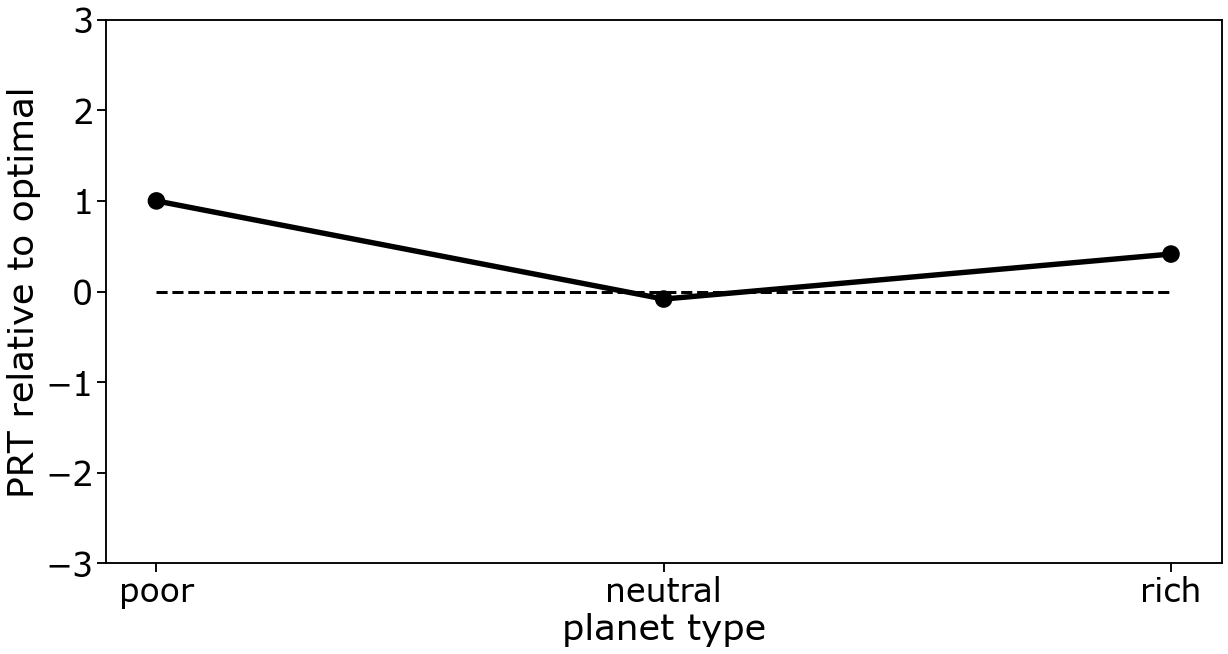

In [5]:
# plot the model generated behavior 
prt_avg = prt.groupby(by="galaxy").mean().reset_index()#average over blocks
g=sns.pointplot(x='galaxy',y='diff_mean',ci=68,color='black',data=prt_avg)
g.set_xticklabels(['poor','neutral','rich'])
plt.plot([0,2],[0,0],'k--')
plt.ylim([-3,3])
plt.ylabel("PRT relative to optimal")
plt.xlabel("planet type")

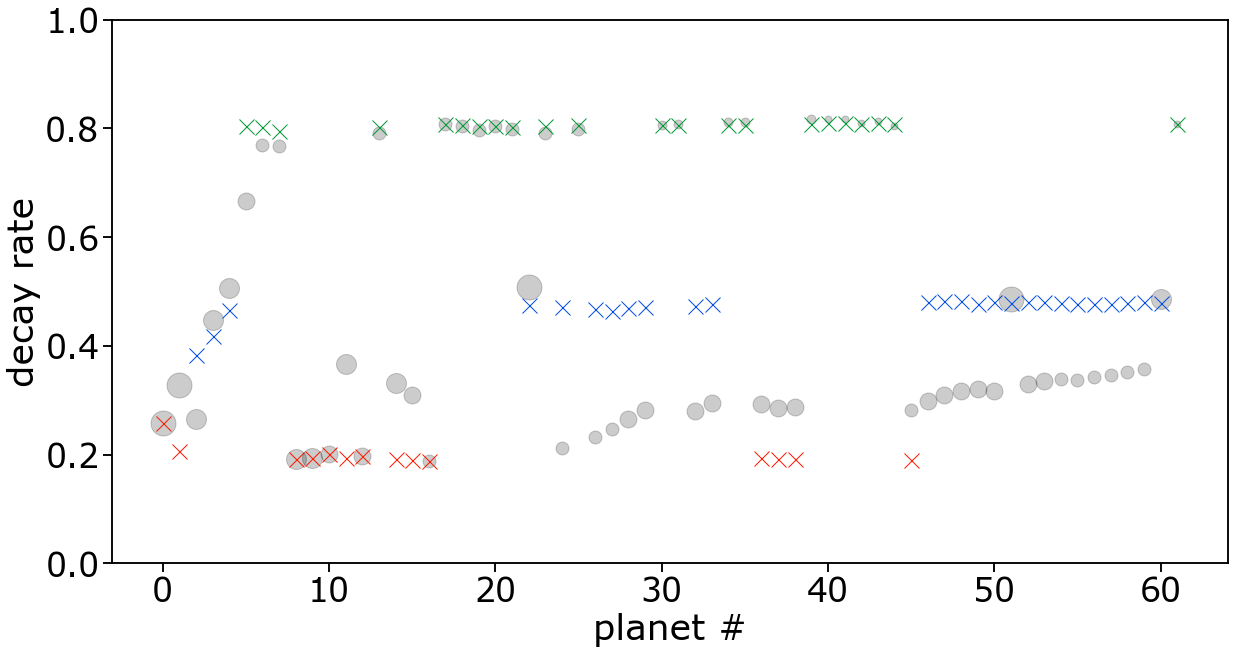

In [6]:
# plot the model's estimated decay rate on each planet 
plot_infer_decay(infer)

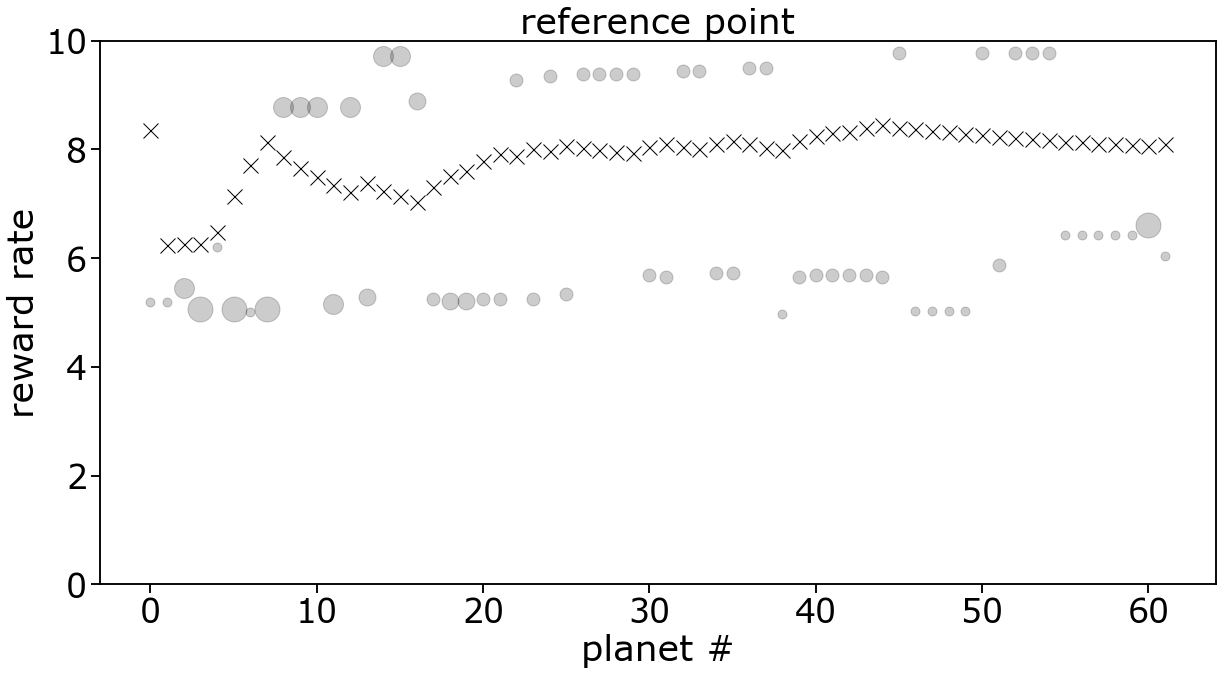

In [7]:
# plot the model's estimated reference point for leaving 
plot_ref_point(infer)

# group level fitting results

In [2]:
# simulate behavior with fit parameters (fit alpha)
os.system("julia load_fit.jl 1")

# simulate behavior with fit parameters (alpha = 0)
os.system("julia load_fit.jl 0")

0

In [ ]:
# load simulations and actual behavior
multimodal = pd.read_csv("results/fit_results_alpha_free.csv")
multimodal["model"] = "multimodal"
multimodal = multimodal.rename(columns={"diff_mean":"prt_rel_om"})

unimodal = pd.read_csv("results/fit_results_alpha_0.csv")
unimodal["model"] = "unimodal"
unimodal = unimodal.rename(columns={"diff_mean":"prt_rel_om"})


true =pd.read_csv("behavioral_data/ref_point_by_block.csv")
true = true.groupby(by=["sub_num","galaxy"]).mean().reset_index()
subs_to_drop = [17,21,24,33,39] 
true = true[~true['sub_num'].isin(subs_to_drop)]
true['model'] = 'true'

all_prt = pd.concat([multimodal,unimodal,true])

In [ ]:
pal = sns.color_palette("Paired")
g=sns.pointplot(x='galaxy',y='prt_rel_om',hue='model',palette=[pal[3],pal[2],"grey"],ci=68,data=all_prt)
g.set_xticklabels(['poor','neutral','rich'])
g.set_ylim([-3,3])
plt.ylabel("PRT relative to optimal")
plt.xlabel("planet type")

# cross validation

In [ ]:
# run cross validation, takes a while on local laptop
os.system("julia run_cross_val.jl")

In [ ]:
# load results, get the difference in cv score between the two models, and then sort by difference for plotting 
cv = pd.read_csv("results/cross_val_results.csv")
cv["diff"] = cv["alpha_0"] - cv["alpha_free"]
cv = cv.sort_values(by='diff')
cv['order'] = range(37)

In [ ]:
g=sns.barplot(x='order',y='diff', palette="Greens",data=cv)
g.set_ylabel("unimodal - multimodal")
g.set_xlabel('subject')
g.set_xticks([])
g.set_xticklabels([],[])
